<a href="https://colab.research.google.com/github/its-rajesh/Programming-Practicum/blob/main/SignalClassV4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIGNAL CLASS

### Imports

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import librosa
import soundfile

In [3]:
import warnings
warnings.filterwarnings("ignore")

### Class definition

In [4]:
class signal():

  '''
  Constructor:
  1. Generation of basic signals
  2. loading own audio file

  BY DEFAULT:
  fs (Sampling frequency in Hz) = 60
  duration (time duration of the signal in seconds): 0.1
  Signal type = sinusoidal [Available: sin/cos]

  GENERAL USE:

  signal(data, fs, duration, signal_type)

  1) for user generation: pass only (fs, duration, signal_type)
  2) for loading the existing audio: pass only (data, fs)

  '''
  def __init__(self, data=[], fs=60, duration=0.1, signal_type='sin'):
    self.signal_type = signal_type
    self.data = data
    self.fs = fs

    if len(self.data) == 0:
      self.flag = False # this is set for identification whether the signal is loaded or generated. True means loaded
    else:
      self.flag = True # setting true coz it is loaded.

    if self.flag: # checks whether data is given or not. If given, it is loaded by librosa/soundfile
      self.duration = len(self.data)//self.fs
    else: # Else we have to generate the signal.
      self.duration = duration
      self.n = np.arange(0, self.duration*1, 1/self.fs)
  
      if self.signal_type == 'sin':
        self.data = np.sin(2*np.pi*self.n)
      elif self.signal_type == 'cos':
        self.data = np.cos(2*np.pi*self.n)


  '''
  Add Magic Method: Adds two signals only if its duration and sampling frequency are equal
  '''
  def __add__(self, s2):
    if self.fs == s2.fs and self.duration == s2.duration:
      return self.data + s2.data, self.fs
    else:
      print("ERROR! Sampling frequency (hz) or duration (sec) mismatch")



  '''
  Timescaling Magic Method: Performs compression or expansion of signal
  '''
  def timescale(self, factor):
    if self.signal_type == 'sin' and self.flag == False:
      self.scaled_data = np.sin(factor*2*np.pi*self.n)
    elif self.signal_type == 'cos' and self.flag == False:
      self.scaled_data = np.cos(factor*2*np.pi*self.n)
    elif self.flag == True: #For librosa/soundfile loaded signal
      if factor > 1:
        self.scaled_data = self.data[::factor]
      elif factor < 1 and factor > 0:
        self.scaled_data = self.data[::factor]
      else:
        self.scaled_data = self.data
    return self.scaled_data, self.fs, self.duration

  '''
  Multiplication Magic Method: does scalar amplitude multiplication
  '''
  def __mul__(self, val):
    return self.data * val, self.fs

### Basic Signals

**Useage: signal(fs, duration, signal_type)**

fs = sampling frequency in Hz (default: 60Hz)

duration = signal duration in seconds (default: 0.5s)

signal_type = 'sin' or 'cos' or 'loaded' (default: sinusoidal)

In [21]:
s1 = signal() #creates a signal with default parameters: A sinusoid with sampling frequency of 60Hz and duration of 0.1 seconds
s1.fs, s1.duration, s1.signal_type, len(s1.data)

(60, 0.1, 'sin', 6)

50 1 cos 50


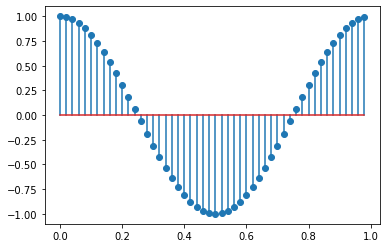

In [38]:
s2 = signal(fs=50, duration=1, signal_type='cos')
print(s2.fs, s2.duration, s2.signal_type, len(s2.data))

x = np.arange(len(s2.data))
plt.stem(x/s2.fs, s2.data)
plt.show()

50 1 sin 50


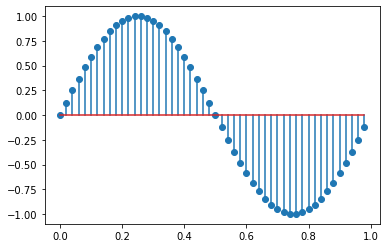

In [39]:
s3 = signal(fs=50, duration=1)
print(s3.fs, s3.duration, s3.signal_type, len(s3.data))

x = np.arange(len(s3.data))
plt.stem(x/s3.fs, s3.data)
plt.show()

Addition:

Can add two signals if sampling frequency and duration matches.

Use: signal_sum = signal1 + signal2

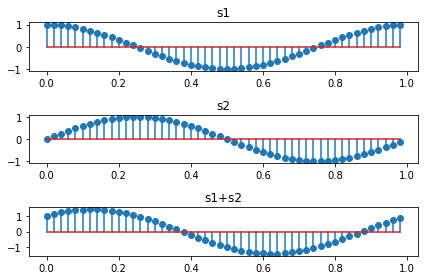

In [36]:
s1 = signal(fs=50, duration=1, signal_type='cos')
s2 = signal(fs=50, duration=1)

s3 = s1+s2 #Signal Addition, returns a tuple of amplitude and fs.
data, fs = s3[0], s3[1]

x = np.arange(len(s1.data))
plt.subplot(3, 1, 1)
plt.title('s1')
plt.stem(x/s1.fs, s1.data)
plt.subplot(3, 1, 2)
plt.title('s2')
plt.stem(x/s2.fs, s2.data)
plt.subplot(3, 1, 3)
plt.title('s1+s2')
plt.stem(x/fs, data)
plt.tight_layout()
plt.show()

Time Scaling:

Use: new_signal = signal.timescale(factor)

1. Compression: factor>1
2. Expansion: 0<factor<1

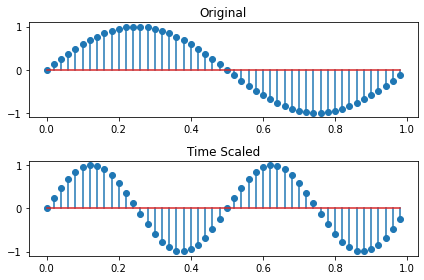

In [45]:
s1 = signal(fs=50, duration=1, signal_type='sin')
scaled = s1.timescale(2) #Time Scaling. returns data and fs
data, fs = scaled[0], scaled[1]

x = np.arange(len(s1.data))
plt.subplot(2, 1, 1)
plt.title('Original')
plt.stem(x/s1.fs, s1.data)
plt.subplot(2, 1, 2)
plt.title('Time Scaled')
plt.stem(x/fs, data)
plt.tight_layout()
plt.show()

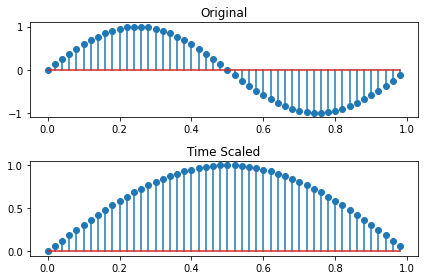

In [44]:
s1 = signal(fs=50, duration=1, signal_type='sin')
scaled = s1.timescale(0.5) #Time Scaling. returns data and fs
data, fs = scaled[0], scaled[1]

x = np.arange(len(s1.data))
plt.subplot(2, 1, 1)
plt.title('Original')
plt.stem(x/s1.fs, s1.data)
plt.subplot(2, 1, 2)
plt.title('Time Scaled')
plt.stem(x/fs, data)
plt.tight_layout()
plt.show()

Amplitude Scaling

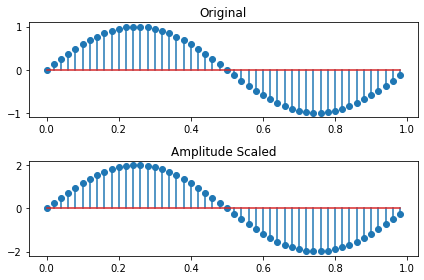

In [43]:
s1 = signal(fs=50, duration=1, signal_type='sin')
scaled = s1*2 #Amplitude Scaling
data, fs = scaled[0], scaled[1]

x = np.arange(len(s1.data))
plt.subplot(2, 1, 1)
plt.title('Original')
plt.stem(x/s1.fs, s1.data)
plt.subplot(2, 1, 2)
plt.title('Amplitude Scaled')
plt.stem(x/fs, data)
plt.tight_layout()
plt.show()

### Loaded Signal

In [5]:
from google.colab import drive
drive.mount('/drive')

audio_path = '/drive/My Drive/Projects/Music-Speech-Separation/Dataset/Mixture/'

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [6]:
y1, fs1 = librosa.load(audio_path+'1.wav')
y2, fs2 = librosa.load(audio_path+'2.wav')

For loading an existing audio file:

**Useage: signal(data, fs)**

data = #generated by librosa or soundfile

fs = sampling frequency in Hz

In [7]:
k1 = signal(data=y1, fs=fs1)
k1.fs, k1.duration, len(k1.data)

(22050, 30, 661500)

In [8]:
k2 = signal(data=y2, fs=fs2)

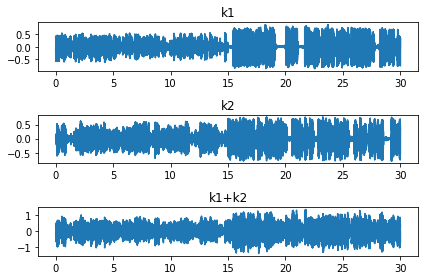

In [9]:
k3 = k1+k2 #Signal Addition
data, fs = k3[0], k3[1]

x = np.arange(len(k1.data))
plt.subplot(3, 1, 1)
plt.title('k1')
plt.plot(x/k1.fs, k1.data)
plt.subplot(3, 1, 2)
plt.title('k2')
plt.plot(x/k2.fs, k2.data)
plt.subplot(3, 1, 3)
plt.title('k1+k2')
plt.plot(x/fs, data)
plt.tight_layout()
plt.show()

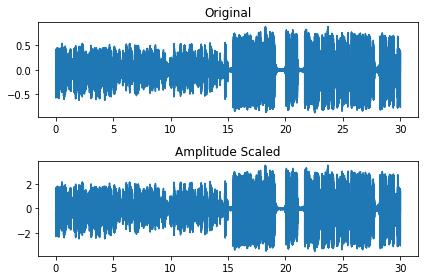

In [10]:
k4 = k1*4 #Amplitude Multiplication
data, fs = k4[0], k4[1]


x = np.arange(len(k1.data))
plt.subplot(2, 1, 1)
plt.title('Original')
plt.plot(x/k1.fs, k1.data)
plt.subplot(2, 1, 2)
plt.title('Amplitude Scaled')
plt.plot(x/fs, data)
plt.tight_layout()
plt.show()

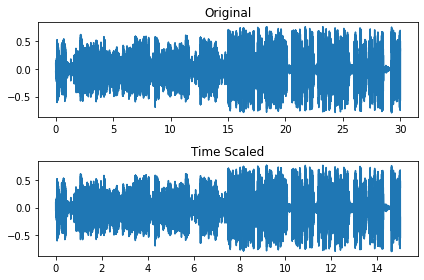

In [16]:
k5 = k2.timescale(2) #Time scaling
data, fs = k5[0], k5[1]

x = np.arange(len(k2.data))
plt.subplot(2, 1, 1)
plt.title('Original')
plt.plot(x/k2.fs, k2.data)
x2 = np.arange(len(data))
plt.subplot(2, 1, 2)
plt.title('Time Scaled')
plt.plot(x2/fs, data)
plt.tight_layout()
plt.show()